# IoT·인공지능·빅데이터 개론 및 실습 <br> 3/8 Logistic Regerssion & Neural Network with Scikit-Learn

Adapted by Seonwoo Min from the "An Introduction to Machine Learning with Scikit-learn" tutorial (http://scikit-learn.org/stable/tutorial/basic/tutorial.html).

In this excercise, we will cover:

* Loading an example dataset & preprocessing
* Logistic regression & neural network models in scikit-learn
* Model training & prediction & evaluation
* Model save & load
* Homework

## 1. Loading an example dataset & preprocessing

In [ ]:
from sklearn.datasets import load_digits
data = load_digits()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [ ]:
# Data shape & statistics
print("Data: ", data['data'].shape) #data 차원이 64차원(8*8의 이미지), 1797개
print("Label:", data['target'].shape) #numpy에서 형태를 알려줌

# Print the number of samples for each class
import numpy as np
#################### To Do #################################

print(np.unique(data['target'])) #1797개. unique : data target array 내에 어떤 unique한 값이 존재하는가?

print(np.sum(data['target'] == 0))

for i in range(10):
  wh = data['target'] == i #booloin 값이 일단 wh에 반환되는데
  count = np.sum(wh) #sum을 통해서 wh의 true 갯수를 count에 넣어 준다.
  print('In class %d, %d' % (i, count))
  
############################################################

Data:  (1797, 64)
Label: (1797,)
[0 1 2 3 4 5 6 7 8 9]
178
In class 0, 178
In class 1, 182
In class 2, 177
In class 3, 183
In class 4, 181
In class 5, 182
In class 6, 181
In class 7, 179
In class 8, 174
In class 9, 180


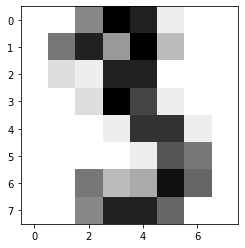

In [ ]:
#############################################################
# Data Visaulization
#############################################################
import matplotlib.pyplot as plt
%matplotlib inline

#################### To Do ################################# 
# Hint: plt.imshow(data['data'][i].reshape(8,8), cmap=plt.cm.gray_r)
plt.imshow(data['data'][3].reshape(8,8), cmap=plt.cm.gray_r) #i를 넣을 때마다 plot의 형태가 바뀜
plt.show() #분리해야 되는 데이터는 숫자 데이터(8*8 이미지를 한 줄로 나열한 것을 data로 갖고있음.)
############################################################

In [ ]:
#############################################################
# 1st Preprocessing
# Use the first 20 samples in each clss as test data
# Use the others as training data
#############################################################
train_data = []
test_data = []

train_target = []
test_target = []
#################### To Do #################################

N = len(data['data'])
for c in range(10):
  is_in_this_class = data['target'] == c  # boolean (1797,)
  
  data_in_this_class = data['data'][is_in_this_class]  # (178, 64)
  target_in_this_class = data['target'][is_in_this_class]
  
  test_data.append(data_in_this_class[:20])
  train_data.append(data_in_this_class[20:])
  test_target.append(target_in_this_class[:20])
  train_target.append(target_in_this_class[20:])

# concatenate 전에는 (10, 20, 64)

test_data = np.concatenate(test_data)
train_data = np.concatenate(train_data)
test_target = np.concatenate(test_target)
train_target = np.concatenate(train_target)

############################################################

print(test_data.shape)
print(train_data.shape)

(200, 64)
(1597, 64)


In [ ]:
#############################################################
# 2nd Preprocessing
# Let's use only 2 and 3 for binary classification
#############################################################

#################### To Do #################################
train_data23 = []
test_data23 = []

train_target23 = []
test_target23 = []
#################### To Do #################################

N = len(data['data'])
for c in [2, 3]: #여기만 차이 있음....
  is_in_this_class = data['target'] == c  # boolean (1797,)
  
  data_in_this_class = data['data'][is_in_this_class]  # (178, 64)
  target_in_this_class = data['target'][is_in_this_class]
  
  test_data23.append(data_in_this_class[:20])
  train_data23.append(data_in_this_class[20:])
  test_target23.append(target_in_this_class[:20])
  train_target23.append(target_in_this_class[20:])

test_data23 = np.concatenate(test_data23)
train_data23 = np.concatenate(train_data23)
test_target23 = np.concatenate(test_target23)
train_target23 = np.concatenate(train_target23)

############################################################

print(test_data23.shape)
print(train_data23.shape)

(40, 64)
(320, 64)


## 2. Logistic regression & neural network models in scikit-learn

For full documentations refer to the following links: <br>
Logistic Regression: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html <br>
Neural network: http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

LR = LogisticRegression(max_iter=1000, solver='sag')
NN = MLPClassifier(hidden_layer_sizes=(10), activation='relu', learning_rate_init=0.01, max_iter=1000)

## 3. Model training & prediction & evaluation

In [ ]:
#############################################################
# Logistic regression model
#############################################################
# Training
LR = LogisticRegression(max_iter=1000, solver='sag') #logisticregression 저기 max iter 을 충분히 늘려서 뭔가를 실행해줌.
#solver는 optimizer의 종류임
LR.fit(train_data23, train_target23) 

# Prediction
train_predict23 = LR.predict(train_data23)
train_prob23 = LR.predict_proba(train_data23)

test_predict23 = LR.predict(test_data23)
test_prob23 = LR.predict_proba(test_data23)

#print("test_target     :", test_target23)
#print("test_prediction :", test_predict23)
#print("train_prob :", train_prob23[:10])
#print("test_prob :", test_prob23[:10])

#################### To Do #################################

is_correct = train_predict23 == train_target23
train_acc23 = np.mean(is_correct)
is_correct = test_predict23 == test_target23
test_acc23 = np.mean(is_correct)


############################################################

print("train_acc :", train_acc23) #이걸 하는게 underfitting에 대한 여부를 파악하려고 함.
print("test_acc  :", test_acc23)

train_acc : 1.0
test_acc  : 0.975


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
#############################################################
# Neural network model
############################################################# 

#################### To Do #################################
NN = MLPClassifier(hidden_layer_sizes=(10,), activation='tanh', learning_rate_init=1e-2, max_iter=100) 
#다양한 parameter을 바꾸면서 추후 homework를 풀 때 key가 될 듯 함. layer sizes는 일정량 이상으로, 
NN.fit(train_data23, train_target23)

# Prediction
train_predict23 = NN.predict(train_data23)
train_prob23 = NN.predict_proba(train_data23)
test_predict23 = NN.predict(test_data23)
test_prob23 = NN.predict_proba(test_data23)
#print("test_target     :", test_target23)
#print("test_prediction :", test_predict23)
#print("train_prob :", train_prob23[:10])
#print("test_prob :", test_prob23[:10])

is_correct = train_predict23 == train_target23
train_acc23 = np.mean(is_correct)
is_correct = test_predict23 == test_target23
test_acc23 = np.mean(is_correct)


############################################################ Neural netowork model이 더 맞는 것 같음.

print("train_acc :", train_acc23)
print("test_acc  :", test_acc23)
############################################################ 

train_acc : 1.0
test_acc  : 0.975


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


## 4. Model save & load

In [ ]:
# from sklearn.externals import joblib
import joblib
import os

if not os.path.exists('models'):
    os.makedirs('models')
    
# save
joblib.dump(NN, 'models/NN23.joblib') 

# load
NN_load = joblib.load('models/NN23.joblib') 

#################### To Do #################################
train_predict23 = NN_load.predict(train_data23)
train_prob23 = NN_load.predict_proba(train_data23)

############################################################

## 5. Homework
Now it's your job to experiment with models and achieve higher accuracy on the  **<font color=red>on the entire dataset</font>**. <br>
Try different hyperparameter configurations and save the final model as "final_model.joblib" <br>
Submit the current **notebook file and the saved final model** on ETL.
* Maximum 10 points for >= 97% accuracy on the test set
* Maximum 8 points for >= 96% accuracy on the test set
* Maximum 6 points for >= 95% accuracy on the test set
* Maximum 4 points for >= 94% accuracy on the test set

In [ ]:
#############################################################
# Try different hyperparameters
# Final model training
############################################################# 전체 숫자에 대한 classfier test 종류는 아무거나상관없음,
#class별로 20개만 test data로 들어감.


#################### To Do #################################
train_data = []
test_data = []

train_target = []
test_target = []

N = len(data['data'])
for c in range(10):
  is_in_this_class = data['target'] == c  # boolean (1797,)
  
  data_in_this_class = data['data'][is_in_this_class]  # (178, 64)
  target_in_this_class = data['target'][is_in_this_class]
  
  test_data.append(data_in_this_class[:20])
  train_data.append(data_in_this_class[20:])
  test_target.append(target_in_this_class[:20])
  train_target.append(target_in_this_class[20:])


test_data = np.concatenate(test_data)
train_data = np.concatenate(train_data)
test_target = np.concatenate(test_target)
train_target = np.concatenate(train_target)

NN = MLPClassifier(hidden_layer_sizes=(50), activation='tanh', learning_rate_init=1e-3, max_iter=1200) 
NN.fit(train_data, train_target)

# NN = MLPClassifier(hidden_layer_sizes=(33), activation='tanh', learning_rate_init=1e-3, max_iter=1200) 0.965 최고기록

train_predict = NN.predict(train_data)
train_prob = NN.predict_proba(train_data)
test_predict = NN.predict(test_data)
test_prob = NN.predict_proba(test_data)

is_correct = train_predict == train_target
train_acc = np.mean(is_correct)
is_correct = test_predict == test_target
test_acc = np.mean(is_correct)

import joblib
import os

if not os.path.exists('models'):
    os.makedirs('models')
    
# save
joblib.dump(NN, 'models/NN23.joblib') 




print("train_acc :", train_acc)
print("test_acc  :", test_acc)
############################################################

train_acc : 1.0
test_acc  : 0.97


In [146]:
#############################################################
# Final model test
# Load the final model and obatin the test accuracy
############################################################# joblib는 굳이 안해도되지만 일단 해보기.


# load
NN_load = joblib.load('models/NN23.joblib') 

#################### To Do #################################
train_predict = NN_load.predict(train_data)
train_prob = NN_load.predict_proba(train_data)
test_predict = NN_load.predict(test_data)
test_prob = NN_load.predict_proba(test_data)

is_correct = train_predict == train_target
train_acc = np.mean(is_correct)
is_correct = test_predict == test_target
test_acc = np.mean(is_correct)

print("train_acc :", train_acc)
print("test_acc  :", test_acc)

############################################################

train_acc : 1.0
test_acc  : 0.97


### Describe what you did here
In this cell you should also write an explanation of what you did, any additional features that you implemented, and any visualizations or graphs that you make in the process of training and evaluating your model.
* Maximum 10 points

앞서 neural networking이 logistic regression model보다 성능이 더 뛰어남을 고려하여, neural networking을 통해서 model을 만들어보기로 했다.그리하여 activation='tanh' 함수 형태는 그대로 두고, hidden layer 개수를 1개씩 늘려 33개로 두었다. max_iter은 100 단위씩 높여보면서 가장 높은 결과가 나오는 1200으로 나오도록 찾았고, learing rate init도 조절하여 1e-3이 나오도록 했다.
그 중에서 가장 좋은 결과가 나오도록 반복 했다.